In [1]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
import os
os.chdir('C:/pytest/')

In [3]:
def read_data(filename, encoding='cp949', start=1):
    # with 구문의 장점 = close()가 자동으로 실행됨
    with open(filename, 'r', encoding=encoding) as f:
        data = [line for line in f.read().splitlines()]
    return data

def write_data(data, filename, encoding='cp949'): # 쓰기 함수도 정의
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

data = read_data('윤동주시.txt' , encoding='utf8')

In [4]:
data

['1. 내일은 없다',
 '',
 '내일 내일 하기에',
 '',
 '물었더니',
 '',
 '밤을 자고 동틀 때',
 '',
 '내일이라고',
 '',
 '새날을 찾던 나는',
 '',
 '잠을 자고 돌보니',
 '',
 '그때는 내일이 아니라',
 '',
 '오늘이더라',
 '',
 '동무여!',
 '',
 '내일은 없나니……',
 '',
 '2. 흰 그림자',
 '황혼이 짙어지는 길모금에서',
 '',
 '하루 종일 시든 귀를 가만히 기울이면',
 '',
 '땅거미 옮겨지는 발자취 소리,',
 '',
 '발자취 소리를 들을 수 있도록',
 '',
 '나는 총명했던가요.',
 '',
 '3. 별 헤는 밤',
 '계절이 지나가는 하늘에는 가을로 가득 차 있습니다.',
 '',
 '나는 아무 걱정도 없이',
 '',
 '가을 속의 별들을 다 헤일 듯 합니다.',
 '',
 '가슴 속에 하나 둘 새겨지는 별을 이제 다 못헤는 것은',
 '',
 '쉬이 아침이 오는 까닭이요, 내일 밤이 남은 까닭이요,',
 '',
 '아직 나의 청춘이 다 하지 않은 까닭입니다.',
 '',
 '4. 쉽게 씌여진 시',
 '창밖에 밤비가 속살거려',
 '',
 '육첩방은 남의 나라,',
 '',
 '시인이란 슬픈 천명인줄 알면서도',
 '',
 '한줄 시를 적어 볼까.',
 '',
 '5. 병원',
 '나의 늙은 의사는 젊은이의 병을 모른다.',
 '',
 '나한테는 병이 없다고 한다.',
 '',
 '이 지나친 시련, 이 지나친 피로, 나는 성내서는 안 된다.',
 '',
 '6. 새로운 길',
 '내를 건너서 숲으로',
 '',
 '고개를 넘어서 마을로',
 '',
 '어제도 가고 오늘도 갈',
 '',
 '나의 길 새로운 길',
 '',
 '7. 아우의 인상화',
 '붉은 이마에 싸늘한 달이 서리어',
 '',
 '아우의 얼굴은 슬픈 그림이다.',
 '',
 '발걸음을 멈추어',
 '',
 '살그머니 앳된 손을 잡으며',
 '',
 '"너는 자라 무엇이 되려니"',
 '',

In [6]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi= True)
    joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
    if joined_data_each: # 내용이 있는 경우만 저장하게 함
        morphed_data += joined_data_each + "\n"
# 형태소 분석된 파일 저장
write_data(morphed_data, '윤동주시_morphed.txt', encoding='utf8')

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [11]:
data = read_data('윤동주시_morphed.txt', encoding='utf8', start=0)
print(len(data))

93


In [12]:
# 공백을 추가하며 모든 리스트 요소들을 결합한 후 공백 단위로 분리하여 하나의 리스트로 만든다
mergedText = ' '.join(data)
# print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')
# print('mergedTextList:', mergedTextList)

In [13]:
from collections import Counter
wordInfo = Counter(mergedTextList) # 하나의 리스트로 묶인 분리된 요소들을 카운트한다 (내림차순)
# print('wordInfo:', wordInfo)

윤동주 단어빈도 총합:  326
윤동주 고빈도 단어:  ['하다', '내일', '사나이', '그', '없다', '오늘', '길', '다', '남다', '어느', '돌아가다', '밤', '속', '까닭', '이', '되다', '새롭다', '가다', '아우', '바람']
윤동주 고빈도 단어비율:  [2.76, 2.45, 1.84, 1.53, 1.23, 1.23, 1.23, 1.23, 1.23, 1.23, 1.23, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]


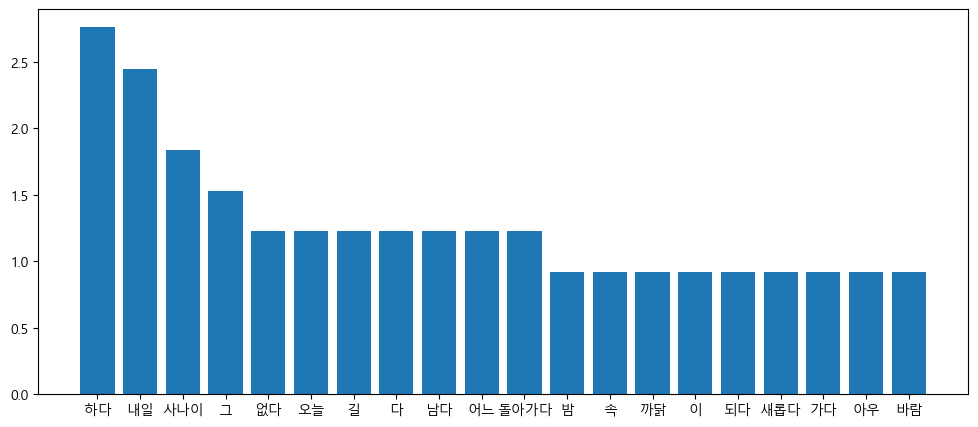

In [14]:
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse = True)
sorted_values = sorted(wordInfo.values(), reverse = True)

print('윤동주 단어빈도 총합: ', sum(sorted_values))
print('윤동주 고빈도 단어: ', sorted_keys[:20])
sorted_rates = list(map(lambda x: round((x / sum(sorted_values))*100, 2), sorted_values))
print('윤동주 고빈도 단어비율: ', sorted_rates[:20])

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.bar(range(20), sorted_rates[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

In [15]:
len_data = []
for d in data:
    len_data.append(len(d.split()))

print('첫번째 문장의 형태소 길이:', len_data[0])

첫번째 문장의 형태소 길이: 2


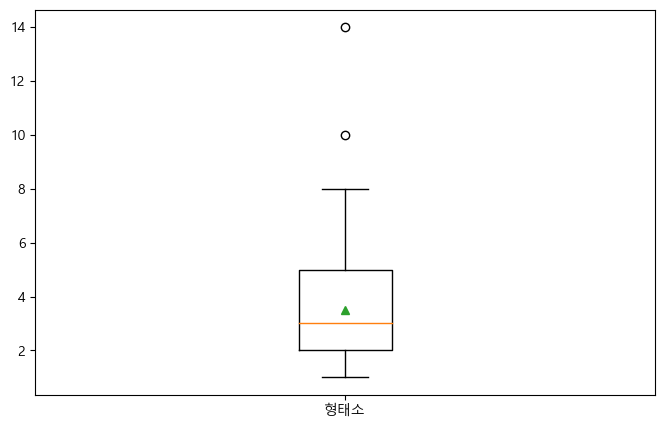

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.boxplot([len_data], labels = ['형태소'], showmeans=True)
plt.show()

In [17]:
import numpy as np

print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))

텍스트 최대 길이: 14
텍스트 최소 길이: 1
텍스트 평균 길이: 3.51
텍스트 길이 표준편차: 2.13
텍스트 중간 길이: 3.0
제 1 사분위 텍스트 길이: 2.0
제 3 사분위 텍스트 길이: 5.0


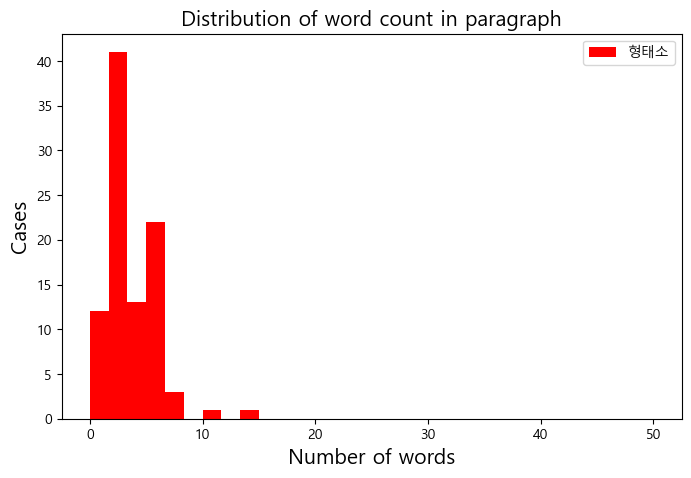

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=30, range=[0,50], facecolor='r', density=False, label='형태소')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()